In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


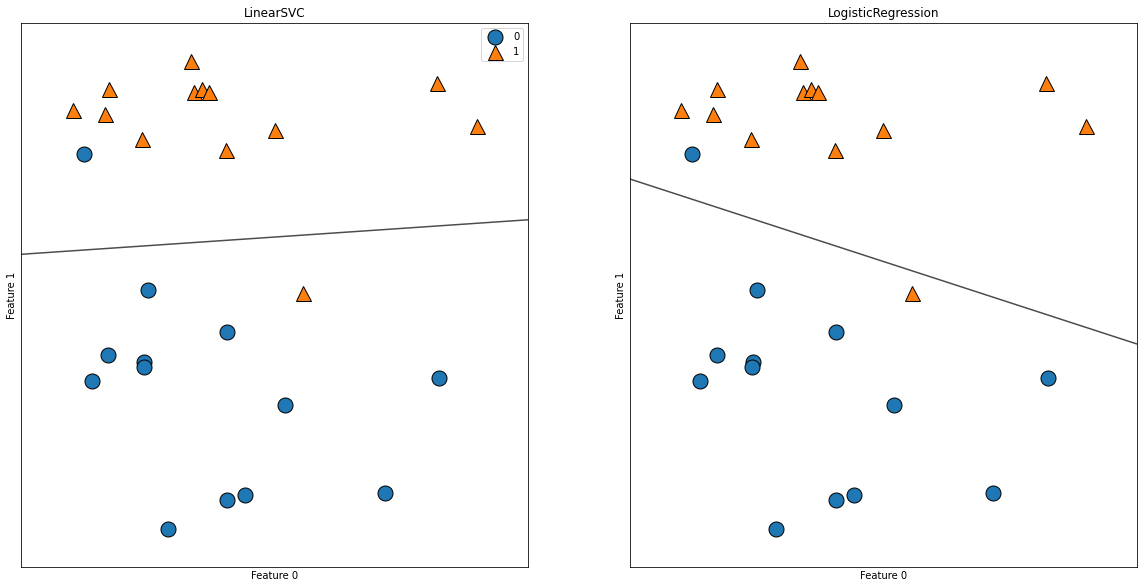

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes): #아예 그냥 zip안에서 함수를 정의해버렸어
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax,s=15)
    ax.set_title(clf.__class__.__name__)   #하 왜 이런 생각을 못할까리.ㅜㅜ
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/Intro_ML/introduction_to_ml_with_python-master/introduction_to_ml_with_python-master/mglearn") #디렉토리 지정하기 거기서 파일 가져오는 거고

from sklearn.datasets import make_blobs
from plot_helpers import discrete_scatter




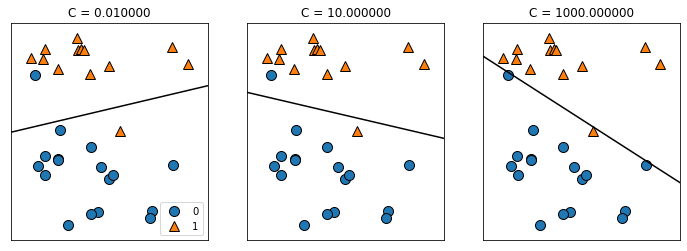

In [ ]:
def plot_linear_svc_regularization():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # a carefully hand-designed dataset lol
    y[7] = 0
    y[27] = 0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    for ax, C in zip(axes, [1e-2, 10, 1e3]):
        discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

        svm = LinearSVC(C=C, tol=0.00001, dual=False).fit(X, y)
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(6, 13)
        yy = a * xx - (svm.intercept_[0]) / w[1]
        ax.plot(xx, yy, c='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("C = %f" % C)
    axes[0].legend(loc="best")

if __name__ == "__main__":
    plot_linear_svc_regularization()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=33)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("C=1")
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}\n".format(logreg.score(X_test, y_test)))


logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("C=0.01")
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}\n".format(logreg001.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100, max_iter=50000).fit(X_train, y_train)
print("C=100")
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

C=1
훈련 세트 점수: 0.972
테스트 세트 점수: 0.944

C=0.01
훈련 세트 점수: 0.953
테스트 세트 점수: 0.930

C=100
훈련 세트 점수: 0.981
테스트 세트 점수: 0.958


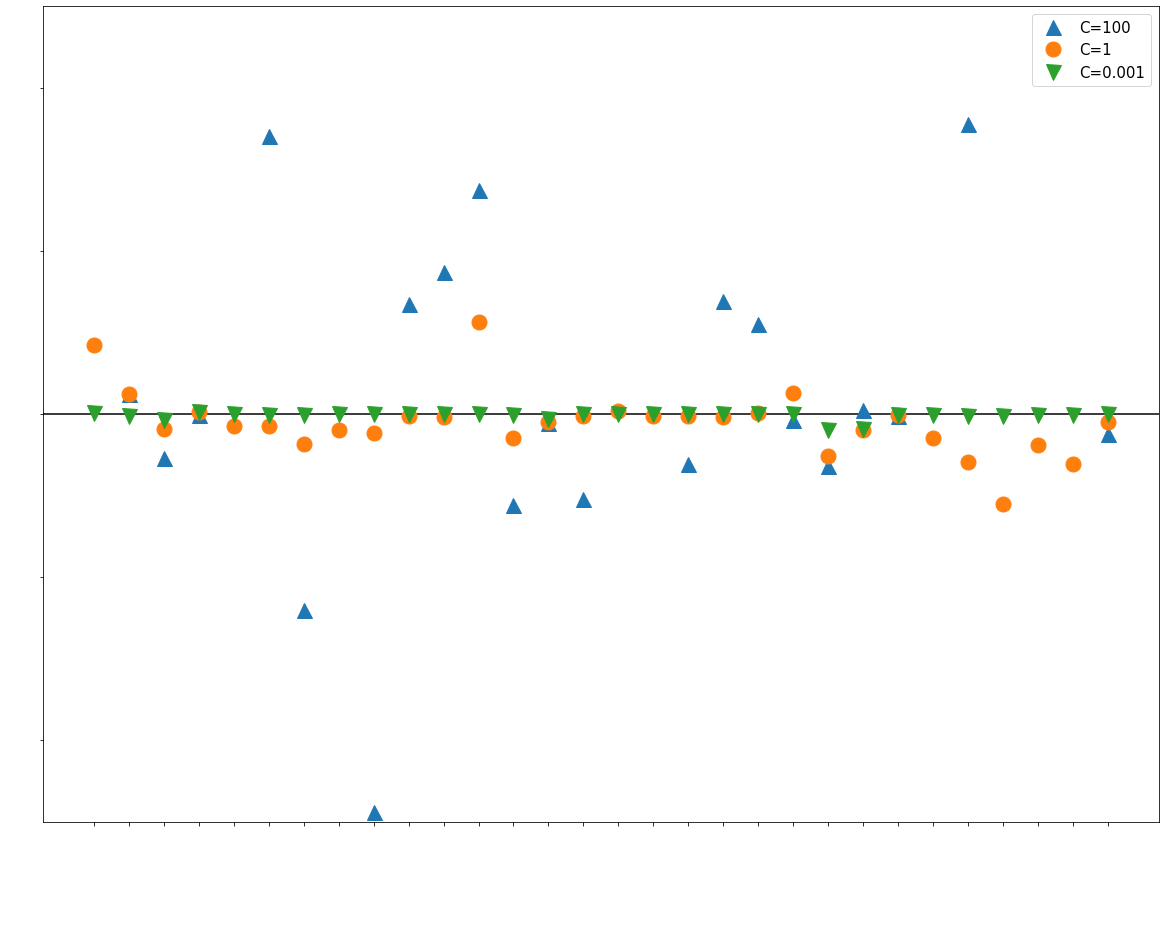

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(logreg100.coef_.T, '^', label="C=100",markersize=15)
plt.plot(logreg.coef_.T, 'o', label="C=1",markersize=15)
plt.plot(logreg001.coef_.T, 'v', label="C=0.001",markersize=15)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=45,color="white")
plt.yticks(color="white")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Features",color="white")
plt.ylabel("Coefficients",color="white")
plt.legend(fontsize=15)

[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text

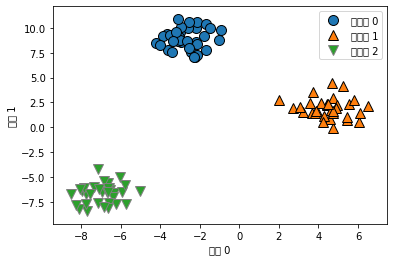

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
print(X)
print(y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [ ]:
linear_svm = LinearSVC().fit(X, y)

print("계수 배열의 크기: ", linear_svm.coef_.shape)
print(linear_svm.coef_)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)
print(linear_svm.intercept_)

계수 배열의 크기:  (3, 2)
[[-0.1749248   0.23140973]
 [ 0.4762144  -0.06937589]
 [-0.18914179 -0.20400557]]
절편 배열의 크기:  (3,)
[-1.07745516  0.1314064  -0.0860501 ]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text

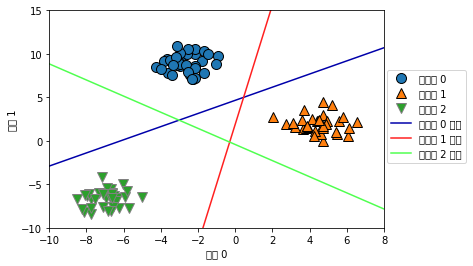

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text

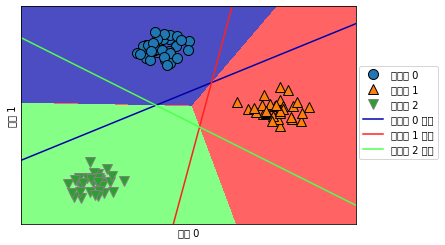

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")